# <a id='contents'>Contents</a>
* [Importing](#importing)
* [Legacy Random Generation](#random)
    * [Quick Introduction](#quick-intro)
    * [Rand](#rand)
    * [Randint](#randint)
    * [Uniform](#uniform)
    * [Normal](#normal)
    * [Seed](#seed)
  
* [Broadcasting](#broadcasting)
* [Linear Algebra](#linalg)
    * [Dot](#dot)
    * [Inverse](#inverse)
    * [Determinant](#det)

* [Axes](#axis)
    * [Understanding Axes](#understanding-axis)
    * [Operations with Axes](#operations)
        * [Axes in Sum](#sum-axis)
        * [Axes in Other Functions](#other-axis)

# <a id='importing'>Importing</a>

In [2]:
import numpy as np

# <a id='random'>Legacy Random Generation</a>

[reference](https://numpy.org/doc/stable/reference/random/legacy.html)

Functions to cover:
* random.rand
* random.randint
* random.uniform
* random.normal
* random.seed

## <a id='quick-intro'>Quick Introduction</a>

Most of you should be aware of random library as follows. Generally, it produces pseudo random values in a variety of ways.

In [2]:
from random import random
random()

0.6636726905934679

In [3]:
from random import randint
randint(1, 10)

7

In [4]:
from random import uniform
uniform(1, 10)

5.18906933049056

In [5]:
from random import seed
# Setting seed for producing constant outputs 
seed(42)

Similar functionalities can be found in NumPy as well.

## <a id='rand'>Rand</a>

To produce values between 0 and 1

In [6]:
np.random.rand()

0.9446461090597278

In [7]:
# it returns an array when you input the size
arr = np.random.rand(1)
arr

array([0.35273287])

In [8]:
arr.shape

(1,)

In [9]:
arr = np.random.rand(2, 3)
arr

array([[0.54009735, 0.39133751, 0.54890607],
       [0.31453795, 0.66204352, 0.65095634]])

In [10]:
arr.shape

(2, 3)

## <a id='randint'>Randint</a>

To produce random values within a specific range for a given size.

In [11]:
np.random.randint(1, 20)

3

In [12]:
arr = np.random.randint(1, 20, size = 5)
arr

array([12, 11,  1,  5,  6])

In [13]:
arr.shape

(5,)

In [14]:
arr = np.random.randint(1, 20, size = (3, 2))
arr

array([[18,  6],
       [12,  5],
       [19, 18]])

In [15]:
arr.shape

(3, 2)

In [16]:
arr.ndim

2

## <a id='uniform'>Uniform</a>

In [17]:
np.random.uniform(1, 20)

11.616091663454615

In [18]:
arr = np.random.uniform(1, 20, size = 5)
arr

array([ 1.09797627, 12.95418973, 13.01406108,  1.533614  , 17.40432637])

In [19]:
arr.shape

(5,)

In [20]:
arr = np.random.uniform(1, 20, size = (3, 2))
arr

array([[ 4.19811709, 16.07377152],
       [17.85972478,  8.0970308 ],
       [ 3.90531863, 17.23128092]])

In [21]:
arr.shape

(3, 2)

## <a id='normal'>Normal</a>

To produce Gaussian normal distribution. We will cover it in more details in further lectures.

In [22]:
# loc --> mean
# scale --> standard deviation
arr = np.random.normal(loc = 0, scale = 1, size = 100)

The picture shows one sample concerning the distribution in size = 100.

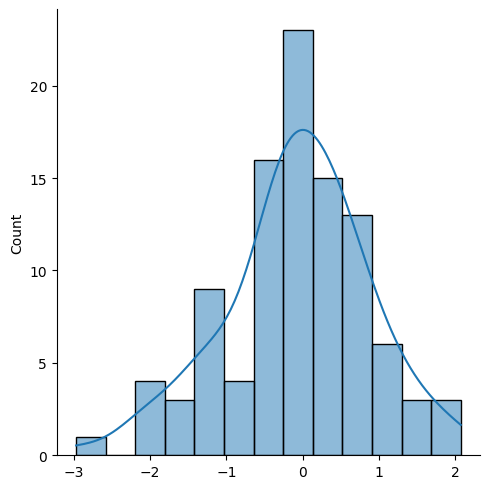

## <a id='seed'>Seed</a>

When you set a particular seed value, you will produce the same results in the generation of pseudo-random numbers.

For instance, no matter how many times you run the cell below, you will get the same thing unless you change anything.

In [23]:
np.random.seed(42)
np.random.randint(1, 20, size = 5)

array([ 7, 15, 11,  8,  7])

There is a well-detailed article on explanation of random seed [here](https://www.sharpsightlabs.com/blog/numpy-random-seed/)

# <a id='broadcasting'>Broadcasting<a>

[reference(1)](https://numpy.org/doc/stable/user/basics.broadcasting.html)


[reference(2)](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

You can suppose this term as a process that checks if shapes do not violate the operation's requirements. For instance, you can obtain element-wise addition results between arrays in the same shape of (4, ) as below.

In [24]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([4, 8, 6, 4])

In [25]:
arr1 + arr2

array([ 5, 10,  9,  8])

But it is not possible with an array that has a completely mismatching shape.

In [26]:
newarr = np.array([2, 5])
newarr.shape

(2,)

In [27]:
newarr + arr1

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [28]:
newarr + arr2

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

This rule applies for any dimension.

In [29]:
arr1 = np.random.randint(1, 20, size = (2, 2))
arr2 = np.random.randint(1, 20, size = (2, 2))

arr1 + arr2

array([[27, 14],
       [13, 16]])

In [30]:
newarr = np.random.randint(1, 20, size = (2, 3))

In [31]:
newarr + arr1

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

Scalar value can be operated with any array.

In [33]:
arr = np.random.randint(1, 20, size = (4, 3, 2))
arr.shape

(4, 3, 2)

In [34]:
(arr * 3).shape

(4, 3, 2)

However, it is possible to complete the mismatching dimension to the maximum by padding. For instance, in the following example, we investigate shapes of (3, 2) and (1, 2).

In [35]:
arr1 = np.random.randint(1, 20, size = (3, 2))
arr2 = np.random.randint(1, 20, size = (1, 2))

In [36]:
arr1.shape

(3, 2)

In [37]:
arr2.shape

(1, 2)

In [38]:
newarr = arr1 + arr2
newarr.shape

(3, 2)

you can suppose this process like this. We concatenate arr2 3 times by itself to complete its dimension to dimensions of arr1.

In [39]:
arr_tuple = (arr2, ) * 3
arr2_padded = np.concatenate(arr_tuple)
arr2_padded.shape

(3, 2)

In [40]:
newarr_2 = arr1 + arr2_padded

As you can see the below, results will be the same.

In [41]:
newarr == newarr_2

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [42]:
(newarr == newarr_2).all()

True

Increasing dimensions, the same idea.

In [43]:
arr1 = np.random.randint(1, 20, size = (3, 4, 2))
arr2 = np.random.randint(1, 20, size = (1, 4, 2))
(arr1 + arr2).shape

(3, 4, 2)

In [44]:
arr1 = np.random.randint(1, 20, size = (4, 2, 3))
arr2 = np.random.randint(1, 20, size = (4, 2, 1))
(arr1 + arr2).shape

(4, 2, 3)

In [45]:
arr1 = np.random.randint(1, 20, size = (4, 1, 3))
arr2 = np.random.randint(1, 20, size = (4, 2, 1))
(arr1 + arr2).shape

(4, 2, 3)

# <a id='linalg'>Linear Algebra</a>

[reference](https://numpy.org/doc/stable/reference/routines.linalg.html)

Functions to cover:
* dot
* linalg.inv
* linalg.det

## <a id='dot'>Dot</a>

Imagine you have two arrays in shapes of (5, 4) and (4, 10) and you want to see results of dot product between them. Expected shape is (5, 10) since 4 is eliminated. 

In [46]:
arr1 = np.random.randint(1, 5, size = (5, 4))
arr2 = np.random.randint(1, 5, size = (4, 10))

In [47]:
arr1

array([[1, 1, 1, 4],
       [1, 3, 1, 2],
       [2, 4, 2, 3],
       [1, 4, 1, 1],
       [3, 2, 2, 1]])

In [48]:
arr2

array([[4, 2, 4, 2, 4, 3, 4, 3, 3, 4],
       [3, 1, 3, 2, 4, 1, 4, 2, 2, 2],
       [3, 3, 4, 4, 1, 1, 4, 3, 2, 4],
       [1, 3, 4, 4, 3, 4, 3, 2, 3, 3]])

In [49]:
newarr = np.dot(arr1, arr2)
newarr

array([[14, 18, 27, 24, 21, 21, 24, 16, 19, 22],
       [18, 14, 25, 20, 23, 15, 26, 16, 17, 20],
       [29, 23, 40, 32, 35, 24, 41, 26, 27, 33],
       [20, 12, 24, 18, 24, 12, 27, 16, 16, 19],
       [25, 17, 30, 22, 25, 17, 31, 21, 20, 27]])

In [50]:
newarr.shape

(5, 10)

dot method also comes inside the array object.

In [51]:
arr1.dot(arr2)

array([[14, 18, 27, 24, 21, 21, 24, 16, 19, 22],
       [18, 14, 25, 20, 23, 15, 26, 16, 17, 20],
       [29, 23, 40, 32, 35, 24, 41, 26, 27, 33],
       [20, 12, 24, 18, 24, 12, 27, 16, 16, 19],
       [25, 17, 30, 22, 25, 17, 31, 21, 20, 27]])

You might have two arrays in shapes of (5, 4) and (10, 4) and be asked to find the dot product.

In [52]:
arr1 = np.random.randint(1, 5, size = (5, 4))
arr2 = np.random.randint(1, 5, size = (10, 4))

In [53]:
arr1.dot(arr2)

ValueError: shapes (5,4) and (10,4) not aligned: 4 (dim 1) != 10 (dim 0)

Dimensions do not match (broadcasting is violated). Let's use transpose of one array and see the results.

In [54]:
arr2_T = arr2.T
arr2_T.shape

(4, 10)

In [55]:
newarr = arr1.dot(arr2_T)
newarr.shape

(5, 10)

What if we could get transpose of first array instead of second?

In [56]:
arr1_T = arr1.T

In [57]:
arr1_T.shape

(4, 5)

In [58]:
arr2.shape

(10, 4)

In [59]:
newarr = arr2.dot(arr1_T)

In [67]:
newarr.shape

(10, 5)

In [68]:
arr_dot = arr1.dot(arr2_T)

In [69]:
np.all(newarr.T == arr_dot)

True

Transpose of the array from dot product matches the previously determined results.

Dot product between vector-like arrays.

In [70]:
vec1 = np.random.randint(1, 10, size=(2, 1))
vec2 = np.random.randint(1, 10, size=(2, 1))

In [71]:
vec2.T.dot(vec1)

array([[87]])

In [72]:
vec1.T.dot(vec2)

array([[87]])

In [73]:
vec1.dot(vec2.T)

array([[81, 18],
       [27,  6]])

In [75]:
vec2.dot(vec1.T)

array([[81, 27],
       [18,  6]])

## <a id='inverse'>Inverse</a>

We use np.linalg.inv to determine the inverse of matrix.

In [76]:
np.random.seed(42)
arr = np.random.randint(1, 20, size = (3, 3))

In [77]:
arr_inv = np.linalg.inv(arr)

In [78]:
arr_inv

array([[-0.11994698,  0.04042412,  0.13783963],
       [ 0.11729622, -0.06163022, -0.02982107],
       [ 0.0072896 ,  0.05831677, -0.04705103]])

Checking if the matrix is really inverse of another matrix.

In [80]:
arr_identity = arr.dot(arr_inv)
arr_identity

array([[ 1.00000000e+00, -2.77555756e-17, -2.08166817e-17],
       [ 5.20417043e-17,  1.00000000e+00, -7.63278329e-17],
       [ 1.24900090e-16,  5.55111512e-17,  1.00000000e+00]])

In [81]:
arr_identity.round()

array([[ 1., -0., -0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

If the dot product of these two matrices is an identity matrix, then they are inverse to each other.

## <a id='det'>Determinant</a>

np.linalg.det is used to find determinant of the matrix.

In [82]:
np.random.seed(42)
arr = np.random.randint(1, 10, size = (2, 2))

In [83]:
arr

array([[7, 4],
       [8, 5]])

In [84]:
round(np.linalg.det(arr), 3)

3.0

# <a id='axis'>Axes</a>

## <a id='understanding-axis'>Understanding Axes</a>

[SharpSightLabs's article](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)

An axis is a specific dimension in the array shape. For example, when you are dealing with indexing, you sometimes refer to (a) specific axis (axes) to call values from the array. 

Given an array in the shape of (4, 5), we request to first axis as follows: 

In [85]:
arr = np.arange(1, 21).reshape(4, 5)

In [86]:
arr.shape

(4, 5)

In [87]:
arr[0]

array([1, 2, 3, 4, 5])

In [88]:
arr[1]

array([ 6,  7,  8,  9, 10])

In [89]:
arr[2]

array([11, 12, 13, 14, 15])

In [90]:
arr[3]

array([16, 17, 18, 19, 20])

Each time, we input an index to first axis and obtain arrays. We can do the same with second axis.

In [91]:
arr[:, 0]

array([ 1,  6, 11, 16])

In [93]:
arr[:, 1]

array([ 2,  7, 12, 17])

In [92]:
arr[:, 2]

array([ 3,  8, 13, 18])

Or both at once.

In [94]:
arr[0, 4]

5

Indexing is not the same with axis. Axis shows ith dimension while indexing is done via a dimension(s). For instance, we could call several indexes at first axis.

By now, we said first or second axes, but to be compatible with NumPy zero-indexed logic, we should paraphrase them as 0th or 1st axes, respectively.

SharpSightLabs provides a pretty good example on their previously referred article to explain axes. Given a 2D array - matrix,

0th axis -> rows 

1st axis -> columns

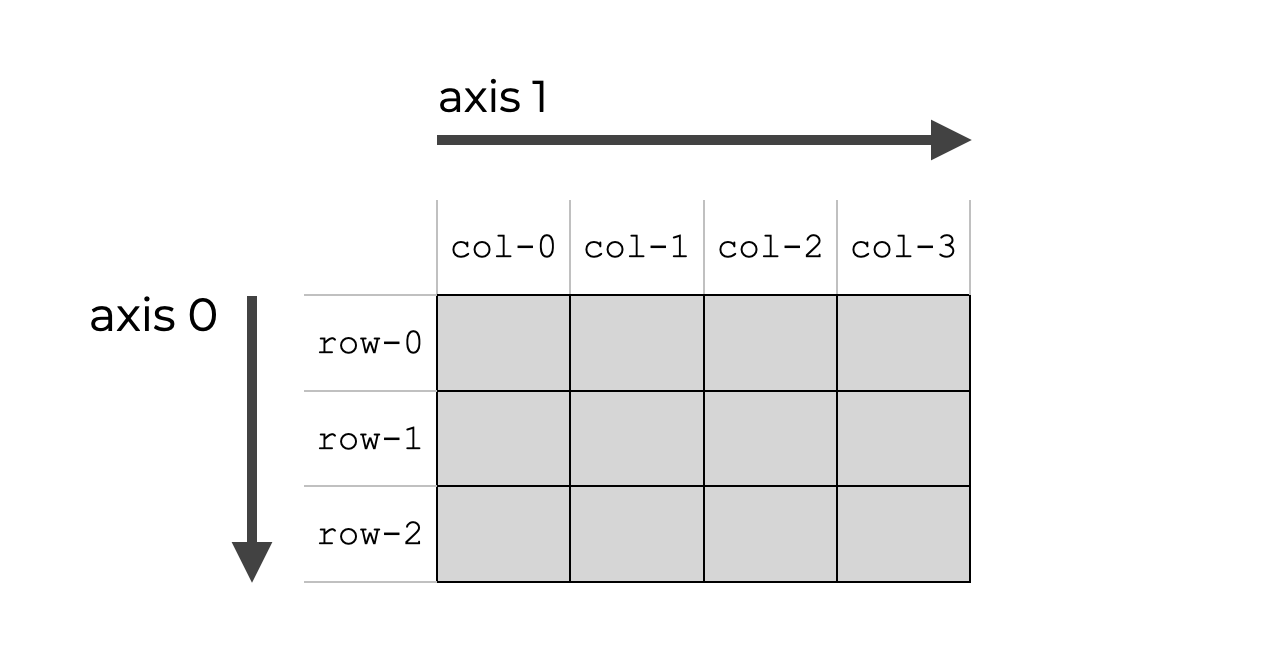

This one below is not from that article. So, don't go back to the article to look for it. The image created in ExCel illustrates how 3D array would look like if we should have constructed values in a correct arrangement. It is like extending the prior 2D array to 3D array by adding axis=2.

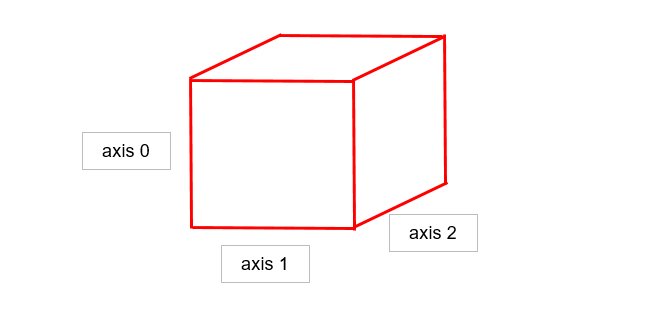

## <a id='operations'>Operations with Axes</a>

### <a id='sum-axis'>Axes in Sum</a>

If you will find axes challenging to comprehend, don't you worry. That's everybody's problems. However, we should keep trying our best to improve our fundamental knowledge of axes.

Now, imagine you have a 2D array. It contains the points players achieved in two sequential games. The first and second columns contain points of the corresponding games. Let me paraphrase, via axis=1 (columns), we have games.

Each row represents individual players. Let me paraphrase again, via axis=0 (rows), we assume separate players.

Your task is to get total points of each player and find the winner.

In [3]:
points = np.array([
    [20, 80],
    [40, 70],
    [100, 0],
    [45, 14],
    [90, 43],
    [10, 100],
    [39, 49],
    [54, 30]
])

In [96]:
points.shape

(8, 2)

So, we got an array in the shape of (8, 2). Axis=0 indicates players and axis=1 indicates games. We have a couple of points for each player. What we want is to get sum of those points in each row. Let's get it manually by using element-wise addition!

Via axis=1, we take columns separately as first_game and second_game. By using element-wise addition, we can get a new array of total points.

In [97]:
first_game = points[:, 0]
second_game = points[:, 1]

In [98]:
first_game

array([ 20,  40, 100,  45,  90,  10,  39,  54])

In [99]:
second_game

array([ 80,  70,   0,  14,  43, 100,  49,  30])

In [100]:
results = first_game + second_game
results

array([100, 110, 100,  59, 133, 110,  88,  84])

In [102]:
results.max()

133

In [103]:
# argmax returns the index of maximum value in the array (and at given axis)
results.argmax()

4

Obviously, the winner is at 4th index with total points of 133.

Via axis=1, we obtained element-wise addition results or, let's say, sum as total points in the new array. Fortunately, sum method provides axis parameter that should be input as 1.

In [105]:
np.sum(points, axis=1)

array([100, 110, 100,  59, 133, 110,  88,  84])

In [104]:
# or
points.sum(axis=1)

array([100, 110, 100,  59, 133, 110,  88,  84])

A new task. This time, we have 12 rows indicating 12 months of data with 5 columns for each customer. The fictional data provided by a bank is used to track their customers' overall money transaction timely. Obtain overall money change of each customer in their bank accounts for the last year.

In [106]:
data = np.array([
    [-54, 48, -21, 17, 63],
    [46, -81, 84, 45, -54],
    [-52, -87, 42, 58, -100],
    [16, -47, 17, -98, 43],
    [84, -89, -27, -85, 99],
    [1, 51, 55, 16, -93],
    [21, -9, 63, -11, 35],
    [85, -41, 77, -73, 0],
    [-60, 91, 54, 90, 44],
    [100, 60, 56, 40, -55],
    [-66, 33, -19, 14, 96],
    [-54, 52, 93, -91, -45]])

In [107]:
data.shape

(12, 5)

Always pay attention to what you want to get. The target is the year - 12 months is to sum 12 months of each customer money transaction. 

* months -> axis=0
* customers -> axis=1

In [108]:
money = data.sum(axis=0)
money

array([ 67, -19, 474, -78,  33])

In [109]:
money.shape

(5,)

You might also be asked to get average monthly money transaction. You just divide money array by 12.

In [110]:
money / 12

array([ 5.58333333, -1.58333333, 39.5       , -6.5       ,  2.75      ])

If you want to get average representation like above, you can use mean function.

In [111]:
data.mean(axis=0)

array([ 5.58333333, -1.58333333, 39.5       , -6.5       ,  2.75      ])

I want you to look at axis from another point of view. I hope you observed how different shapes of input and output arrays are. For example, we moved from (12, 5) to (5, ) in the second task via axis=1. In the first task via axis=0, it was from (8, 2) to (8, ).

Whatever we chose as axis value, the shape was changed accordingly. 

Given a shape of (m, n), if you want to sum at axis=0, you will get (n, ) array. In other words, at axis=1, it returns (m, ).

It doesn't mean you will always eliminate the dimension corresponding to the chosen axis. It depends on your operations. For aggregation functions, such as sum, mean, max, min, etc. most of the time it works like that, but you will see some other different examples as well.

So, let's suppose we have a 3D array in the shape of (m, n, c). We are asked to get sum separately at axis=0, 1, and 2. Let's investigate how shapes change.

In [112]:
arr = np.random.randint(1, 256, size=(5, 10, 2))

In [113]:
print(arr.shape)

arr_sum_0 = arr.sum(axis=0)
print(arr_sum_0.shape)

arr_sum_1 = arr.sum(axis=1)
print(arr_sum_1.shape)

arr_sum_2 = arr.sum(axis=2)
print(arr_sum_2.shape)

(5, 10, 2)
(10, 2)
(5, 2)
(5, 10)


The same idea! Eliminate the corresponding axis and concatenate the other dimension indicators, finally you got the resulting shape.

### <a id='other-axis'>Axes in Other Functions</a>

Try with max, min, mean, prod, std, np.median, var, and more.

In [8]:
arr = np.random.randint(1, 256, size=(5, 10, 2))
arr

array([[[119,  94],
        [150,  38],
        [ 74,  35],
        [134,  82],
        [163,  55],
        [127,  49],
        [ 36, 210],
        [174, 149],
        [133,  30],
        [ 30, 232]],

       [[139,   8],
        [157, 109],
        [229,  11],
        [242, 148],
        [203, 207],
        [206, 175],
        [245,  12],
        [ 42, 243],
        [155,  33],
        [107,   5]],

       [[196, 158],
        [ 67, 217],
        [ 71, 186],
        [ 51, 120],
        [195,  85],
        [153, 130],
        [142, 189],
        [147,  88],
        [ 69, 151],
        [ 39, 189]],

       [[133,  69],
        [184, 160],
        [250,  49],
        [166, 159],
        [ 71, 252],
        [129, 254],
        [ 80,  93],
        [ 84,  70],
        [183,  16],
        [ 49,  63]],

       [[215, 159],
        [183,  67],
        [245,  84],
        [104, 150],
        [213, 210],
        [223,  63],
        [  8, 203],
        [186,  64],
        [244, 203],
        [ 62

In [19]:
arr \
.max(axis=0) \
.shape

(10, 2)

In [22]:
arr.max(axis=1) \
.shape

(5, 2)

In [117]:
arr.max(axis=2).shape

(5, 10)

You can try the above yourself. I am rather opening this subsection for the discussion of another function. np.concatenate.

When dealing with axis, it doesn't mean each operation must return the shape where the prior exis was eliminated. The approach is just used to understand what's going on behind the operation from outer look. However, there is another operation where we can observe the value of the corresponding axis increases but the others did not change. See the below example.

In [ ]:
# arr1 = np.random.randint(1, 20, size = (2, 3))
# arr2 = np.random.randint(1, 20, size = (2, 4))

# print(arr1.shape)
# print(arr2.shape)

In [25]:
arr1 = np.random.randint(1, 20, size = (2, 2))
arr2 = np.random.randint(1, 20, size = (1, 2))

print(arr1.shape)
print(arr2.shape)

(2, 2)
(1, 2)


In [26]:
arr1

array([[11, 17],
       [ 5, 10]])

In [27]:
arr2

array([[16,  4]])

I want to concatenate these two arrays. 

In [32]:
arr_conc = np.concatenate([arr1, arr2])
arr_conc.shape
arr_conc

array([[11, 17],
       [ 5, 10],
       [16,  4]])

In [37]:
# or
arr_conc = np.concatenate([arr1, arr2], axis=0)
arr_conc.shape
# help(np.add_docstring)

(3, 2)

In the first example, I concatenated two arrays without providing axis value while the second cell showed the way with axis=0. Output is the same since concatenate function sets axis=0 by default in case of not being input as shown in the image.

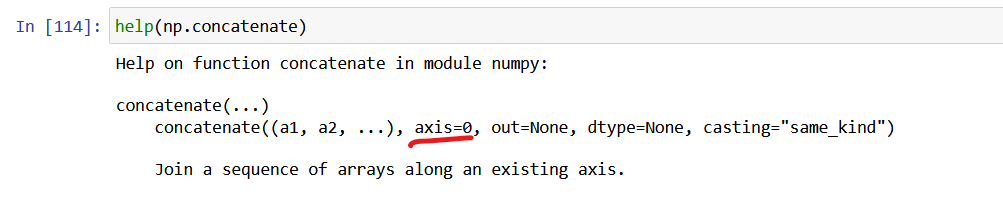

Now, coming to understanding why axis=0, it is because we want to concatenate via axis=0. It means, given shapes of (2, 2) and (1, 2), We are interested in getting (3, 2).

The image illustrates the case with rectangles  and circles. 

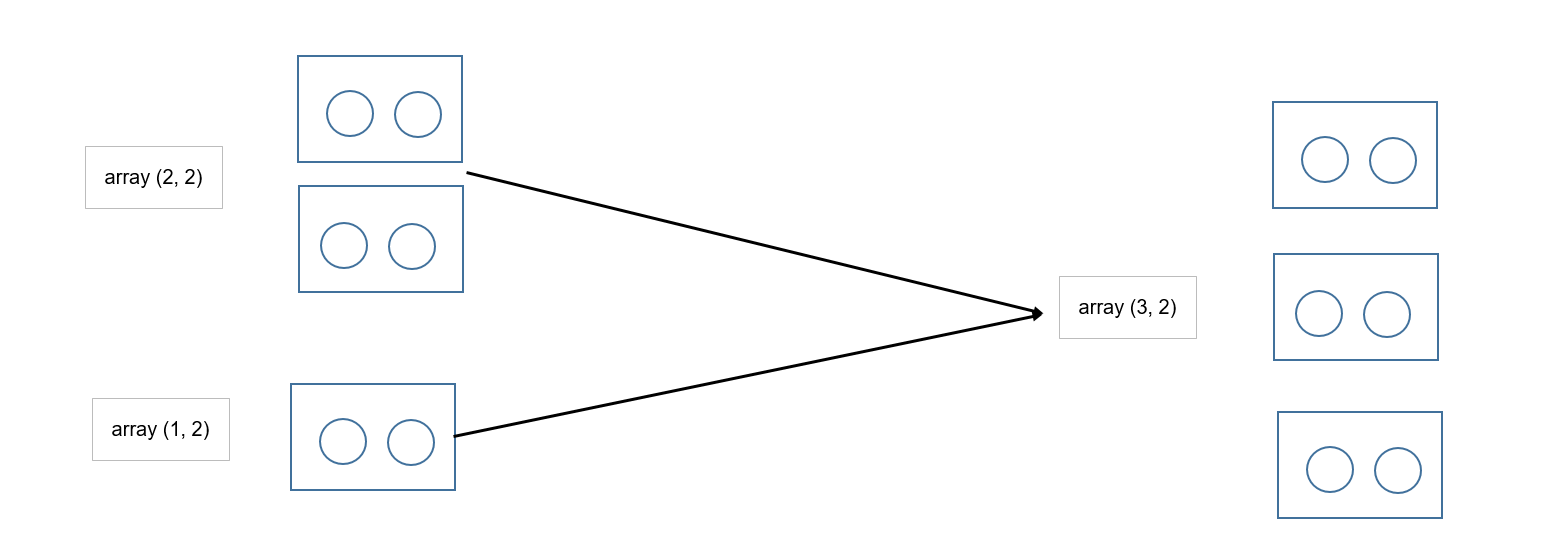

One array in the shape of (2, 2) contains 2 rectangles via axis=0 and 2 circle for each via axis=1. Another array in the shape of (2, 1) has a rectanle with two circle. We see that in both cases we have two circles for each rectangle. 

If you have two rectangles and one rectangle as different arrays and concatenate them together, you will get 3 rectangles. If you have 2 circles inside each rectangle before concatenation, your final results should contains such rectangles that has 2 circles again. In our case, it turns out 3 rectangles, too, with 2 circles.

In this example, we concatenate via axis=1.

In [38]:
arr1 = np.random.randint(1, 20, size = (2, 1))
arr2 = np.random.randint(1, 20, size = (2, 2))

In [39]:
arr1.shape, arr2.shape

((2, 1), (2, 2))

In [40]:
arr_conc = np.concatenate([arr1, arr2], axis=1)
arr_conc.shape

(2, 3)

Let's increase the number of dimensions.

axis=0 example

In [41]:
arr1 = np.random.randint(1, 20, size = (2, 4, 5))
arr2 = np.random.randint(1, 20, size = (3, 4, 5))

print(arr1.shape)
print(arr2.shape)

(2, 4, 5)
(3, 4, 5)


In [42]:
arr_conc = np.concatenate((arr1, arr2), axis=0)
arr_conc.shape

(5, 4, 5)

In [43]:
# or
arr_conc = np.concatenate((arr1, arr2))
arr_conc.shape

(5, 4, 5)

axis=1 example

In [44]:
arr1 = np.random.randint(1, 20, size = (2, 4, 5))
arr2 = np.random.randint(1, 20, size = (2, 3, 5))
print(arr1.shape)
print(arr2.shape)

(2, 4, 5)
(2, 3, 5)


In [46]:
arr_conc = np.concatenate((arr1, arr2), axis=1)
arr_conc.shape

(2, 7, 5)

axis=2 example

In [47]:
arr1 = np.random.randint(1, 20, size = (2, 4, 5))
arr2 = np.random.randint(1, 20, size = (2, 4, 8))

print(arr1.shape)
print(arr2.shape)

(2, 4, 5)
(2, 4, 8)


In [48]:
arr_conc = np.concatenate((arr1, arr2), axis=2)
arr_conc.shape

(2, 4, 13)

In [49]:
# or
arr_conc = np.concatenate((arr1, arr2), axis=-1)
arr_conc.shape

(2, 4, 13)

Finally, boolean functions, such as any and all also expect axis parameter.

In [54]:
one_arr = np.ones((3, 5, 1))
# one_arr

In [55]:
one_arr.shape

(3, 5, 1)

In [61]:
one_arr.all(axis=0) \
.shape


(5, 1)

In [65]:
one_arr.all(axis=1) \
.shape

(3, 1)

In [66]:
one_arr.all(axis=2).shape

(3, 5)

In [67]:
one_arr.all(axis=None)

True

In [68]:
one_arr.any(axis=2).shape

(3, 5)

In [69]:
one_arr.any(axis=None)

True